In [129]:
# -----------------------------
# 🎯 Day 1 – Titanic Dataset (Beginner Friendly)
# -----------------------------

# ✅ Import basics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# -----------------------------
# 1️⃣ Load Dataset
# -----------------------------
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

print("First 5 rows:")
display(df.head())

First 5 rows:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [130]:
# -----------------------------
# 2️⃣ Identify categorical & numerical columns
# -----------------------------
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("\nCategorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)


Categorical columns: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical columns: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [131]:
# ⭐Understand features and target (Survived)
print("Survived:- \n 0 -> Dead, 1 -> Alive",df["Survived"].value_counts())

Survived:- 
 0 -> Dead, 1 -> Alive Survived
0    549
1    342
Name: count, dtype: int64


In [132]:
# -----------------------------
# 3️⃣ Dataset basic info
# -----------------------------
print("\nDataset Info:")
df.info()

print("\nNumerical columns statistics:")
display(df[numerical_cols].describe())

print("\nCategorical columns statistics:")
display(df[categorical_cols].describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Numerical columns statistics:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



Categorical columns statistics:


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,G6,S
freq,1,577,7,4,644


In [133]:
# -----------------------------
# 4️⃣ Missing values check
# -----------------------------
print("\nMissing values per column before cleaning:")
print(df.isnull().sum())
print("Dataset shape:", df.shape)



Missing values per column before cleaning:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Dataset shape: (891, 12)


In [134]:
# -----------------------------
# 5️⃣ Handle missing values
# -----------------------------
# Fill missing Age with median
df["Age"].fillna(df["Age"].median(), inplace=True)
# Drop Cabin column (too many missing)
df.drop(columns=["Cabin"], inplace=True)
# Fill missing Embarked with mode
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

print("\nMissing values after cleaning:")
print(df.isnull().sum())


Missing values after cleaning:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


C:\Users\iamus\AppData\Local\Temp\ipykernel_12760\1602112318.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
C:\Users\iamus\AppData\Local\Temp\ipykernel_12760\1602112318.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

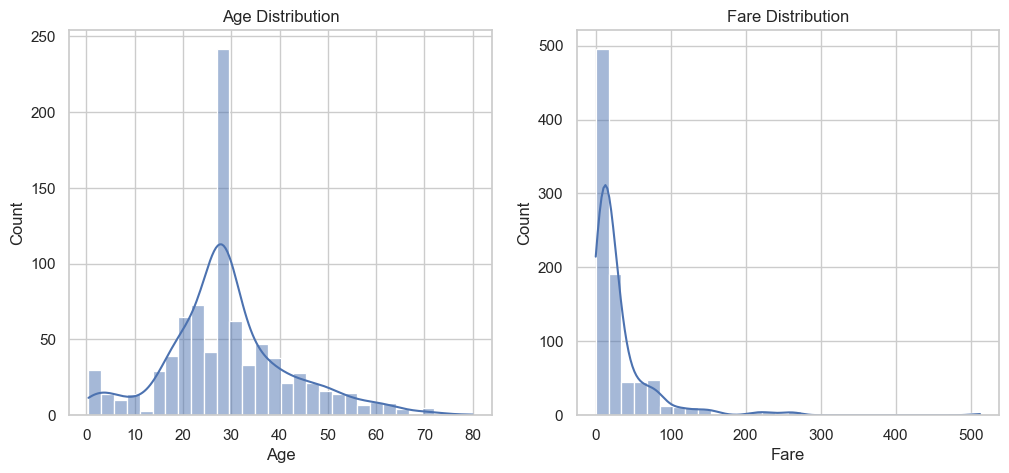

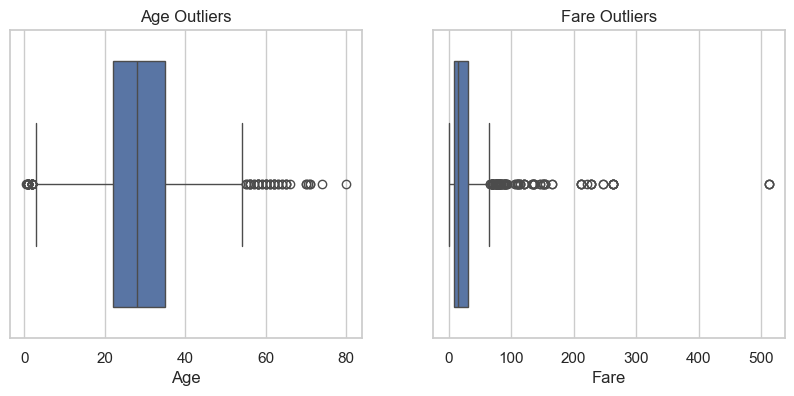

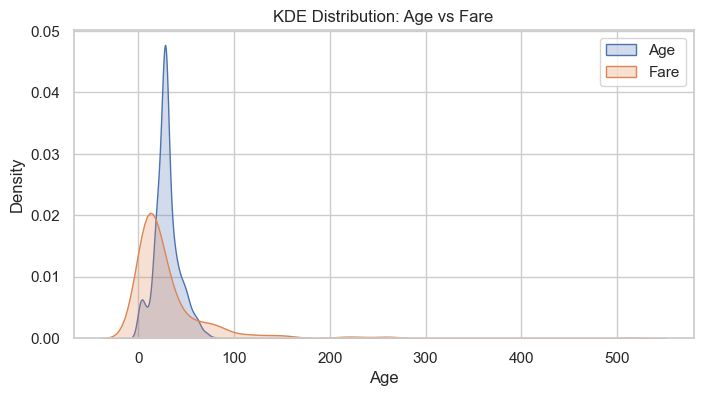

In [135]:
# ⭐Visualize numerical features: Age, Fare

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')

plt.subplot(1,2,2)
sns.histplot(df['Fare'], bins=30, kde=True)
plt.title('Fare Distribution')

plt.show()

# ==BoxPlot==

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.boxplot(x=df['Age'])
plt.title('Age Outliers')

plt.subplot(1,2,2)
sns.boxplot(x=df['Fare'])
plt.title('Fare Outliers')

plt.show()

# ==KdePlot==

plt.figure(figsize=(8,4))
sns.kdeplot(df['Age'], label='Age', fill=True)
sns.kdeplot(df['Fare'], label='Fare', fill=True)
plt.legend()
plt.title('KDE Distribution: Age vs Fare')
plt.show()


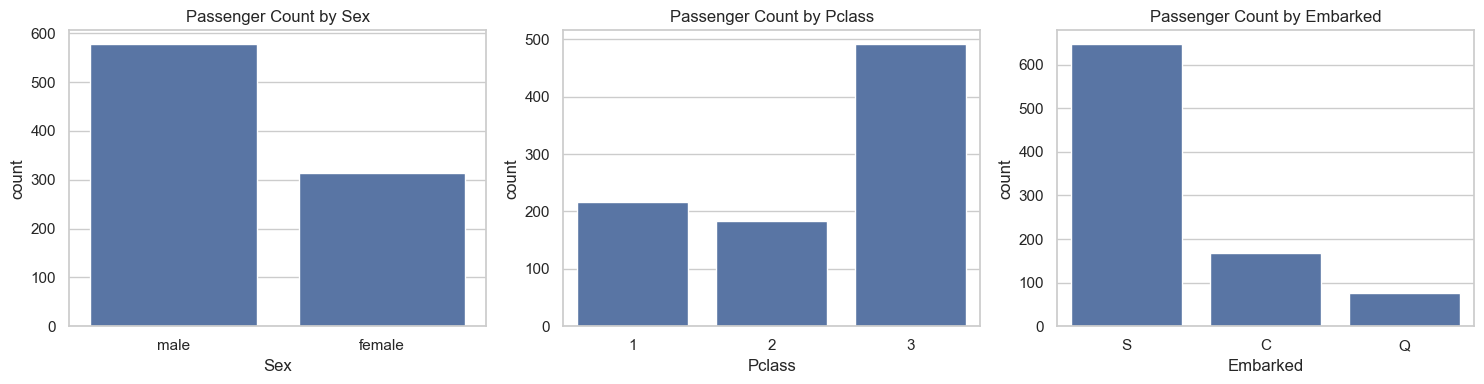

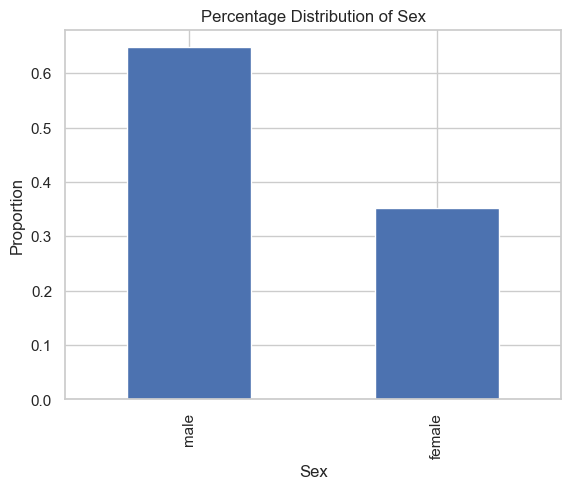

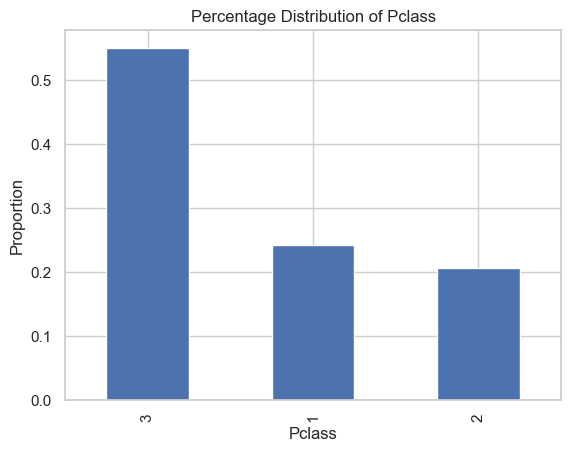

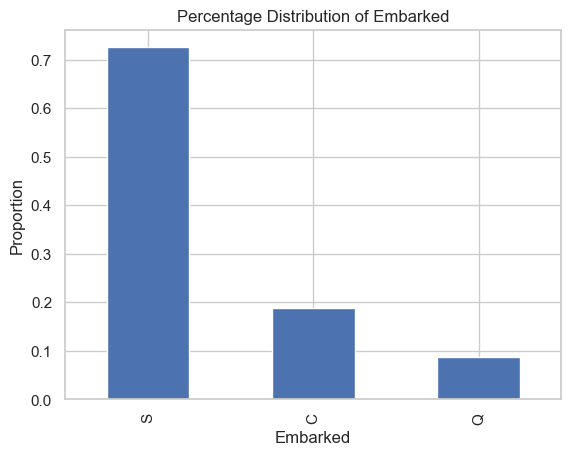

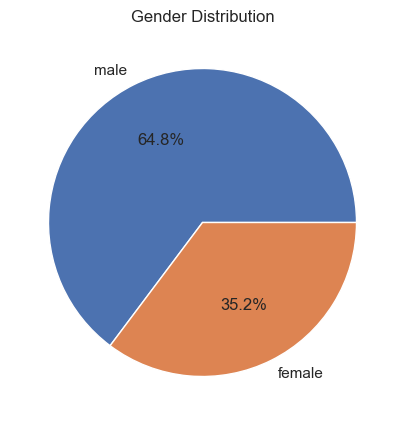

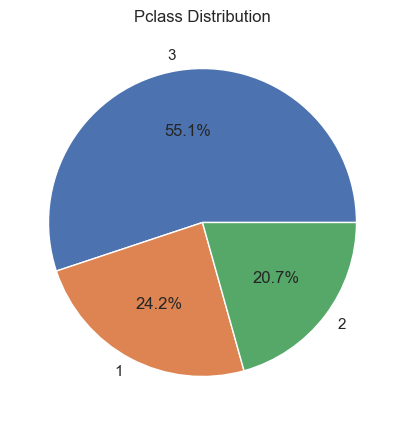

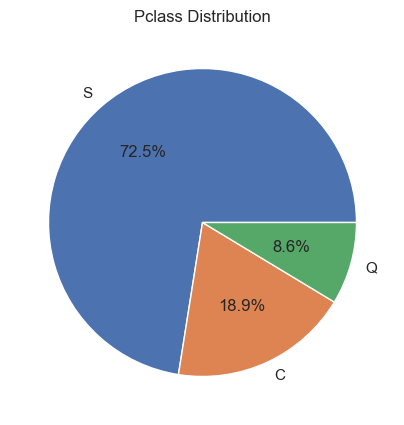

In [136]:
# Visualize categorical features: Sex, Pclass, Embarked

plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
sns.countplot(x='Sex', data=df)
plt.title('Passenger Count by Sex')

plt.subplot(1,3,2)
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Count by Pclass')

plt.subplot(1,3,3)
sns.countplot(x='Embarked', data=df)
plt.title('Passenger Count by Embarked')

plt.tight_layout()
plt.show()

# ==Plot==

for col in ['Sex', 'Pclass', 'Embarked']:
    df[col].value_counts(normalize=True).plot(kind='bar')
    plt.title(f'Percentage Distribution of {col}')
    plt.ylabel('Proportion')
    plt.show()

# ==Plot==
df['Sex'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    figsize=(5,5)
)
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()
# ==Plot==
   
df['Pclass'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    figsize=(5,5)
)
plt.title('Pclass Distribution')
plt.ylabel('')
plt.show()
   
# ==Plot== 
df['Embarked'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    figsize=(5,5)
)
plt.title('Pclass Distribution')
plt.ylabel('')
plt.show()


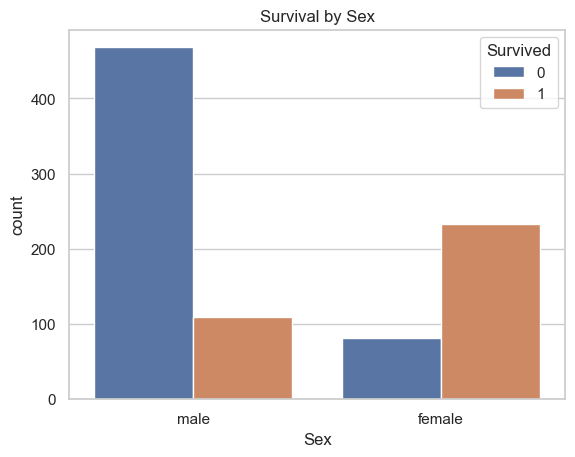

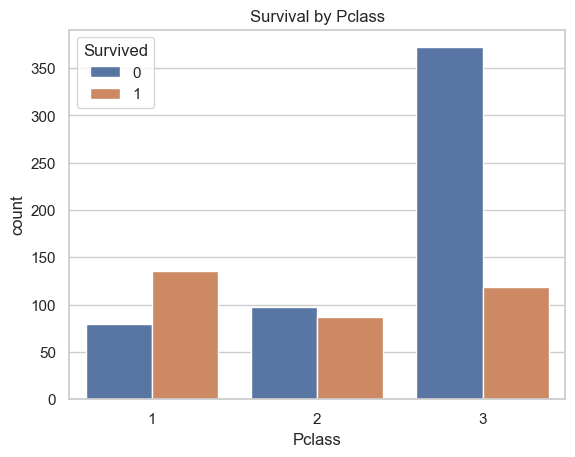

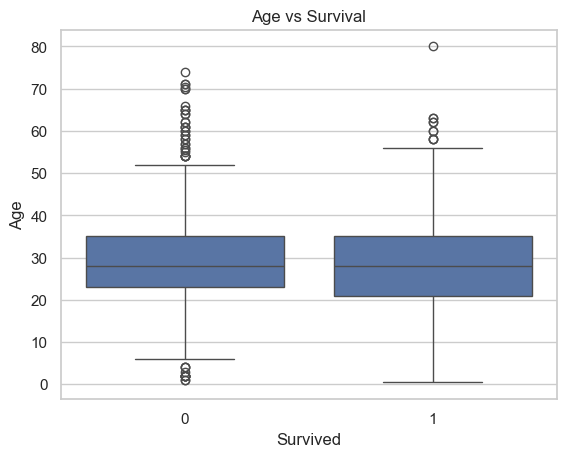

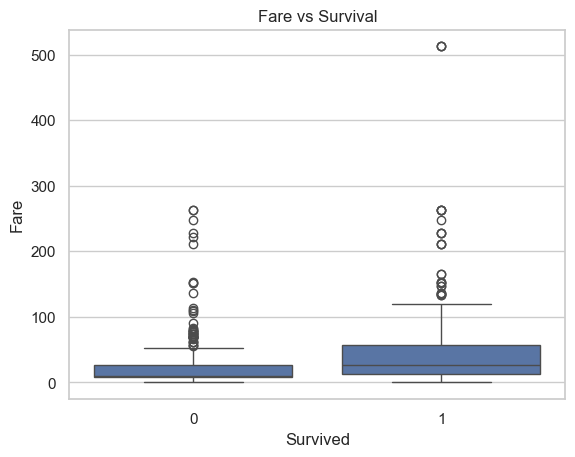

In [137]:
# ⭐Look for trends: Who survived more?
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Sex')
plt.show()

# ==Look for trends== 
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Pclass')
plt.show()
# ==Look for trends== 
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age vs Survival')
plt.show()
# ==Look for trends== 
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare vs Survival')
plt.show()

In [138]:
#⭐ Extract titles from names (Mr, Mrs, Miss)
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
# df.head()
# df["Title"].head()
df['Title'].value_counts()

# ==Check unique titles==
print(df['Title'].unique())

# ==Map rare titles to a common group==
title_mapping = {
    'Mr': 'Mr',
    'Miss': 'Miss',
    'Mrs': 'Mrs',
    'Master': 'Master',
    'Dr': 'Rare',
    'Rev': 'Rare',
    'Col': 'Rare',
    'Major': 'Rare',
    'Mlle': 'Miss',
    'Ms': 'Miss',
    'Mme': 'Mrs',
    'Lady': 'Rare',
    'Sir': 'Rare',
    'Countess': 'Rare',
    'Capt': 'Rare',
    'Don': 'Rare',
    'Jonkheer': 'Rare'
}

df['Title'] = df['Title'].map(title_mapping)

# ==Check the new title counts==
print(df['Title'].value_counts())


['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']
Title
Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: count, dtype: int64


Family Size Check
    SibSp  Parch  FamilySize
0      1      0           2
1      1      0           2
2      0      0           1
3      1      0           2
4      0      0           1
5      0      0           1
6      0      0           1
7      3      1           5
8      0      2           3
9      1      0           2


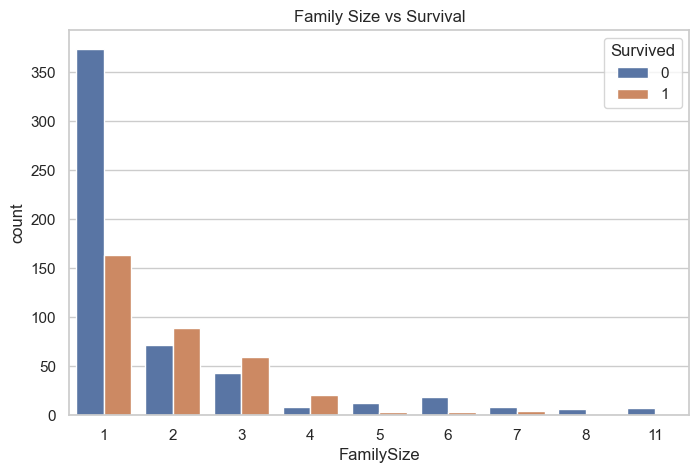

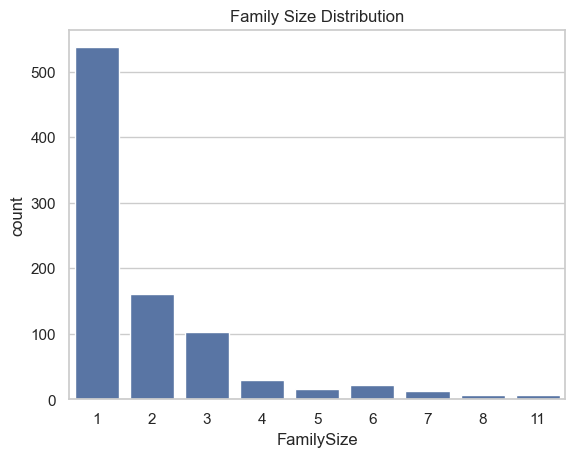

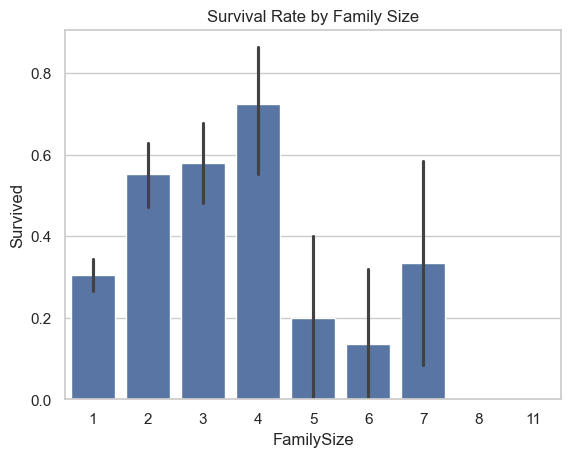

In [139]:
# ⭐Combine SibSp + Parch → FamilySize

# Create a new feature FamilySize
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # +1 includes the passenger themselves

# Check first 10 rows
print("Family Size Check\n",df[['SibSp', 'Parch', 'FamilySize']].head(10))

# Optional: Visualize FamilySize vs Survival
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(x='FamilySize', hue='Survived', data=df)
plt.title('Family Size vs Survival')
plt.show()
# ==Combine==
sns.countplot(x='FamilySize', data=df)
plt.title('Family Size Distribution')
plt.show()
# ==Combine==
sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title('Survival Rate by Family Size')
plt.show()
# ==Combine==

In [140]:
# ⭐Encode categorical features (Sex, Embarked)

# Male = 0, Female = 1
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

df[['Sex', 'Survived']].head()
# ==Encode categorical==
# S=0, C=1, Q=2
df['Embarked'] = df['Embarked'].map({'S':0, 'C':1, 'Q':2})
df[['Embarked', 'Survived']].head()

,Embarked,Survived
0,0,0
1,1,1
2,0,1
3,0,1
4,0,0


In [141]:
#⭐ Use train_test_split from sklearn
# 80/20 split

from sklearn.model_selection import train_test_split

# Features (choose numeric/engineered columns only)
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize']
X = df[features]

# Target
y = df['Survived']

# Display 10th row (index 10)
print("Input:", X.iloc[10].to_dict())
print("Output:", y.iloc[10])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


Input: {'Pclass': 3.0, 'Sex': 1.0, 'Age': 4.0, 'Fare': 16.7, 'Embarked': 0.0, 'FamilySize': 3.0}
Output: 1
X_train shape: (712, 6)
X_test shape: (179, 6)
y_train shape: (712,)
y_test shape: (179,)


In [142]:
# ⭐Logistic Regression (baseline)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

log_model = LogisticRegression(max_iter=500)  # increase max_iter to ensure convergence

log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)
print("y_pred shape:", y_pred.shape)
print("y_pred shape:", y_pred)

y_pred shape: (179,)
y_pred shape: [0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1]


In [143]:
#⭐ Accuracy
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy:", round(acc, 4))

# ⭐Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# ⭐Classification Report
print(classification_report(y_test, y_pred))


Test Accuracy: 0.8101
Confusion Matrix:
 [[91 14]
 [20 54]]
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [144]:
# ⭐Random Forest (stronger)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rf_model = RandomForestClassifier(
    n_estimators=100,       # number of trees
    random_state=42,        # reproducibility
    max_depth=5,            # limit depth to avoid overfitting
    min_samples_split=2     # default splitting
)

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("y_pred_rf shape:", y_pred_rf.shape)
print("y_pred_rf shape:", y_pred_rf)

y_pred_rf shape: (179,)
y_pred_rf shape: [0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1]


In [145]:
# ⭐ccuracy
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Test Accuracy:", round(acc_rf, 4))

# ⭐Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", cm_rf)

# ⭐Classification Report
print(classification_report(y_test, y_pred_rf))


Random Forest Test Accuracy: 0.8101
Confusion Matrix:
 [[93 12]
 [22 52]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       105
           1       0.81      0.70      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



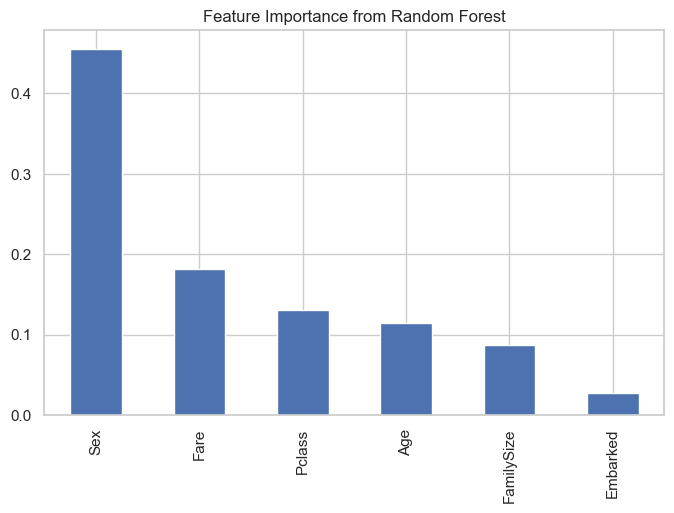

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns

feat_importance = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feat_importance.sort_values(ascending=False).plot(kind='bar', figsize=(8,5))
plt.title("Feature Importance from Random Forest")
plt.show()

# Insights:
# Usually Sex, Pclass, Fare, Title show highest importance
# FamilySize also contributes

In [147]:
# ⭐Accuracy score
from sklearn.metrics import accuracy_score

# Logistic Regression accuracy
log_acc = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", round(log_acc, 4))


Logistic Regression Accuracy: 0.8101


In [148]:
# ⭐Random Forest accuracy
rf_acc = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", round(rf_acc, 4))


Random Forest Accuracy: 0.8101


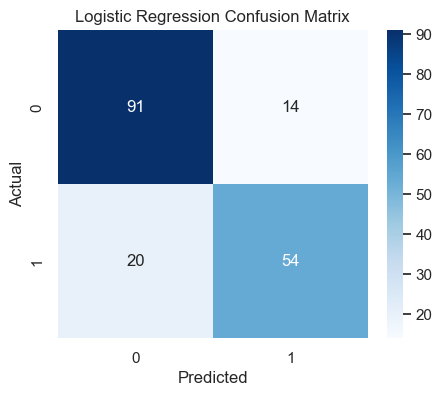

In [149]:
# ⭐Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
cm_log = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(5,4))
sns.heatmap(cm_log, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")
plt.show()


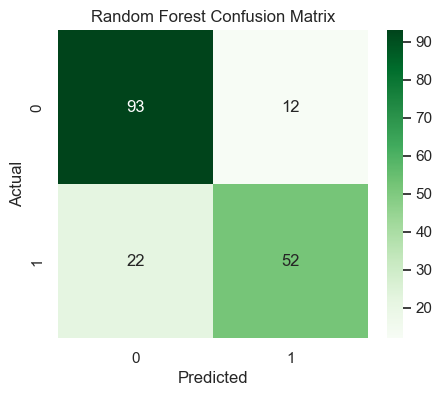

In [150]:
# ⭐Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot
plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()


In [151]:
# ⭐Simple discussion of errors

# -----------------------------
# Titanic Model Errors Discussion & Tips
# -----------------------------

# Simple discussion of errors:
# Logistic Regression and Random Forest make errors mainly because:
# 1. Some features like Age have missing values → less predictive power
# 2. Complex nonlinear interactions between features (e.g., FamilySize + Pclass)
# 3. Categorical nuances like Title or Cabin not fully encoded
# 4. Rare categories (Embarked=Q/C) may have fewer samples → harder to predict
# 5. Random chance (Titanic survival was influenced by luck!)

# Tips & Tricks to improve models:
# ✅ Feature Engineering:
#    - Extract titles from Name (Mr, Mrs, Miss, Master)
#    - Create FamilySize from SibSp + Parch
#    - Optional: categorize FamilySize (Alone, Small, Large)
# ✅ Handle Missing Values:
#    - Fill Age using median or Title-based median
#    - Fill Embarked with mode
# ✅ Encoding:
#    - Convert categorical features to numeric (Sex, Embarked, Title)
# ✅ Model Selection & Tuning:
#    - Start with Logistic Regression (baseline)
#    - Use Random Forest / XGBoost for stronger performance
#    - Tune hyperparameters (max_depth, n_estimators, min_samples_split)
# ✅ Evaluation:
#    - Check Accuracy, Confusion Matrix, Classification Report
#    - Compare multiple models to select the best
# ✅ Visualization:
#    - Plot feature importance from Random Forest
#    - Explore survival trends by Sex, Pclass, Age, FamilySize

# -----------------------------
# Summary Table of Models & Performance
# -----------------------------
import pandas as pd

data = {
    "Model": ["Logistic Regression", "Random Forest"],
    "Accuracy": [round(accuracy_score(y_test, y_pred), 4),
                 round(accuracy_score(y_test, y_pred_rf), 4)],
    "Notes": [
        "Baseline model, linear, may miss nonlinear patterns",
        "Handles nonlinear interactions, better overall performance"
    ]
}

summary_df = pd.DataFrame(data)
summary_df


,Model,Accuracy,Notes
0,Logistic Regression,0.8101,"Baseline model, linear, may miss nonlinear pat..."
1,Random Forest,0.8101,"Handles nonlinear interactions, better overall..."
